In [ ]:
import pickle
from extract_consecutive_screenshots import get_pickle_name, load_objects, load_snapshot_data, analyze_run
from visualization import get_connection, get_gta_image_jpg_dir
from os import path
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
import numpy as np
# JPEG_DIR = get_gta_image_jpg_dir()
JPEG_DIR = 'D:/GTAV_extraction_output/rgb-jpeg'

In [ ]:
def display_snapshots(car, indices=100):
    if type(indices) is int:
        snapshots_range = (0, indices)
    elif type(indices) in [tuple, list]:
        snapshots_range = indices        
    for snapshot in car['snapshots'][snapshots_range[0]:snapshots_range[1]]:
        # print(snapshot)
        plt.figure(figsize=(18,18))
        img_path = path.join(JPEG_DIR, 'info-' + snapshot['image'] + '-0.jpg')
        print(img_path)
        img = Image.open(img_path)
        size = img.size
        bbox = np.array(snapshot['bbox'])
        print(size)
        bbox[:, 0] *= size[0]
        bbox[:, 1] *= size[1]
        print(bbox)
        width, height = bbox[0, :] - bbox[1, :]
        rect = patches.Rectangle(bbox[1, :], width, height, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        plt.gca().add_patch(rect)
        
        plt.imshow(img)
        plt.show()

In [ ]:
run_id = 52
analyze_run(run_id)

In [ ]:
conn = get_connection()
run_id = 52
cars = load_objects(run_id)
len(cars)

In [ ]:
car = list(cars.values())[4410]
len(car['snapshots'])
snaps = car['snapshots']

In [ ]:
for car in list(cars.values())[4410:4411]:
    display_snapshots(car, (0, 20))

In [ ]:
snapshot = car['snapshots'][0]
# print(snapshot)
bbox = snapshot['bbox']
# print(bbox)
pos1 = np.array(car['snapshots'][0]['position'])
pos2 = np.array(car['snapshots'][1]['position'])
print(pos1, pos2)
pos2 - pos1
snapshot1 = load_snapshot_data(car['snapshots'][0]['snapshot_id'])
snapshot2 = load_snapshot_data(car['snapshots'][1]['snapshot_id'])
# print(snapshot1, snapshot2)
pos1_homo = np.append(pos1, 1)
print(pos1_homo)
print(snapshot1['view_matrix'])
viewed = np.matmul(pos1_homo, snapshot1['view_matrix'])
projected = np.matmul(viewed, snapshot1['proj_matrix'])
print('viewed', viewed)
print('projected', projected)
print(viewed / viewed[3])
print(projected / projected[3])
print(bbox)

print(snapshot1['timestamp'])
print(snapshot2['timestamp'])
print(snapshot2['timestamp'] - snapshot1['timestamp'])
print((snapshot2['timestamp'] - snapshot1['timestamp']).total_seconds())


### Testing whether matpltolib displaying works:

In [ ]:
import matplotlib
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
'DISPLAY' in os.environ

In [ ]:
img_path = '/datagrid/personal/racinmat/GTA-jpg/info-2017-11-25--01-59-56--393-0.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.show()

In [ ]:
exitval = os.system('python -c "import matplotlib.pyplot as plt; plt.figure()"')
exitval

In [ ]:
arr = [1, 2, 3, 4, 5]
arr[4:5]
type(cars)

In [ ]:
car

In [ ]:
list(cars.values())[8]

#### playing with coordinates

In [ ]:
fx = 1
fy = 1
cx = 1
cy = 1

projection = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
])

viewport = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0, 0,   1],
])

# vecs_3d = np.eye(3)
vec_3d = np.array([
    [1, 2, 1, 1], 
    [1, 1, 2, 1], 
    [1, 1, 1, 2]
])
base_homo = np.vstack((vec_3d, np.ones(vec_3d.shape[1])))
tmp = np.matmul(projection, base_homo)
in_plane = np.matmul(viewport, tmp)
in_plane = in_plane[0:2,:] / in_plane[2,:]

In [ ]:
in_plane[0:2,:] / in_plane[2,:]

In [ ]:
proj_matrix = [[0.0033408345178822974,0.00000000000541810525481537,-0.000000000003395690385777847,0.000000006448863859587206],
               [0.000000000011212100626821622,0.0033408344344528166,0.00000000000223493727864732,-0.00000001733577048579349],
                [0.0000000000006709455750076875,-0.000000000003768028993206621,-0.00046103226552438563,0.92717973872632550],
               [0.00000000000000000,0.00000000000000000,0.00000000000000000,1.00000000000000000]]
proj_matrix = np.array(proj_matrix)
view_matrix = [[0.99702072143554690,-0.07713291049003601,0.00000000000000000,3154.52976655940440000],
               [0.06535770744085312,0.84481430053710940,0.53105276823043820,-1790.31525175574030000],
               [-0.04096164554357529,-0.52947062253952030,0.84733867645263670,1175.29422811363100000],
               [0.00000000000000000,0.00000000000000000,0.00000000000000000,1.00000000000000000]]
view_matrix = np.array(view_matrix)
bbox = np.array([(0.4197019636631012,0.43263527750968933),
                 (0.0730963870882988,0.15234601497650146)])
bbox3d = np.array([[-1.10799407958984, -2.97677373886108, -0.731413125991821, 0],
                  [1.10799407958984, 2.37375974655151, 1.56551647186279, 0]]).T
bbox_pos = np.array([-2712.16064453125, 2290.10668945312, 18.4052906036377, 1]).T
bbox3d[:,0] += bbox_pos
bbox3d[:,1] += bbox_pos
print(bbox3d)
# bbox3d_cam = np.matmul(view_matrix, np.matmul(proj_matrix, bbox3d))
# bbox3d_cam = np.matmul(view_matrix, bbox3d)
bbox3d_cam = np.matmul(np.linalg.inv(view_matrix), bbox3d)
# bbox3d_cam = np.matmul(proj_matrix, bbox3d)
# bbox3d_cam = np.matmul(proj_matrix, np.matmul(view_matrix, bbox3d))
print(bbox3d_cam)
bbox2d = bbox3d_cam[0:2,:] / bbox3d_cam[2,:]
print(bbox2d)
fov = 50
# bbox2d * fov
bbox2d

#### showing consecutive cars sorted by sequence length

In [ ]:
d = {handle: len(car['snapshots']) for handle, car in cars.items()}
list(sorted(d.items(), key=lambda x: -x[1]))

## analyzing one car

#### getting index of car value by its handle

In [ ]:
handle = 504336
indices = [key for key, i in enumerate(cars.values()) if i['handle'] == handle]
car_index = indices[0]
indices

In [ ]:
def get_pos_diffs(snapshots):
    pos_diffs = []
    positions = [snap['position'] for snap in snapshots]
    for i in range(1, len(snapshots)):
        diff = np.array(positions[i]) - np.array(positions[i - 1])
        pos_diffs.append(diff)
    return pos_diffs

def get_time_diffs(snapshots):
    # gets difference in seconds, for normalization
    time_diffs = []
    times = [snap['timestamp'] for snap in snapshots]
    for i in range(1, len(snapshots)):
        diff = (times[i] - times[i - 1]).total_seconds()
        time_diffs.append(diff)
    return time_diffs


In [ ]:
from pprint import pprint
# car_index = 4405
car = list(cars.values())[car_index]
pos_diffs = get_pos_diffs(car['snapshots'])
time_diffs = get_time_diffs(car['snapshots'])


In [ ]:
car['snapshots']

In [ ]:
pprint(list(enumerate(pos_diffs)))

In [ ]:
snapshot = snaps[0]
snapshot
# car

In [ ]:
def show_snapshot(snapshot):
    img_path = path.join(JPEG_DIR, 'info-' + snapshot['image'] + '-0.jpg')
    # print(img_path)
    img = Image.open(img_path)
    size = img.size
    bbox = np.array(snapshot['bbox'])
    # print(size)
    bbox[:, 0] *= size[0]
    bbox[:, 1] *= size[1]
    # print(bbox)
    width, height = bbox[0, :] - bbox[1, :]
    rect = patches.Rectangle(bbox[1, :], width, height, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    plt.figure()
    plt.gca().add_patch(rect)        
    plt.imshow(img)
    plt.show()
    
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [ ]:
%matplotlib inline

show_snapshot(snaps[0])
show_snapshot(snaps[1])
show_snapshot(snaps[2])


In [ ]:
direction = snapshot['cam_direction']
print(direction)
direction[0] ** 2 + direction[1] ** 2 + direction[2] ** 2
angle_between(pos_diffs[0], snapshot['cam_direction'])
angle_between(pos_diffs[0][0:2], snapshot['cam_direction'][0:2])
# angle_between([0, 1], [2, 2])
# relative = np.matmul(snapshot['view_matrix'], to_homo(pos_diffs[0]))
# relative
# make one axe perpendicualr to 2D view, and use it as base for transforming the direction to relative one

In [ ]:
# transformation to relative
diff = pos_diffs[0]
cam = snapshot['cam_direction']
base = np.array([
    [cam[0], cam[1]],
    [cam[1], -cam[0]]
])

relative = np.matmul(base, diff[0:2])
relative

In [ ]:
def transform_to_relative(diff, cam):
    base = np.array([
        [cam[0], cam[1]],
        [cam[1], -cam[0]]
    ])
    return np.matmul(base, diff[0:2])

def normalize_diff(relative_diff, time_diff):
    return relative_diff / time_diff
    

#### calculating and showing all images and their dirs

In [ ]:
%matplotlib inline

car = cars[list(cars.keys())[150]]
snaps = car['snapshots']
pos_diffs = get_pos_diffs(snaps)
time_diffs = get_time_diffs(snaps)

for i in range(min(20, len(pos_diffs))):
    snap = snaps[i]
    print(snap)
    diff = pos_diffs[i]
    time_diff = time_diffs[i]
    show_snapshot(snap)
    print('time diff:', time_diff)
    diff_relative = transform_to_relative(diff, snap['cam_direction'][0:2])
    print('diff_relative:', diff_relative)
    diff_normalized = normalize_diff(diff_relative, time_diff)
    print('diff_normalized:', diff_normalized)

In [ ]:
diff = pos_diffs[0]
cam = snapshot['cam_direction']
print('diff:', diff)
print('cam:', cam)
print('0, 1:', angle_between((diff[0], diff[1]), (cam[0], cam[1])) * (180 / np.pi))
print('0, 2:', angle_between((diff[0], diff[2]), (cam[0], cam[2])) * (180 / np.pi))
print('1, 2:', angle_between((diff[1], diff[2]), (cam[1], cam[2])) * (180 / np.pi))

In [ ]:
%matplotlib notebook

# prepare directions
dirs = np.array([s['cam_direction'] for s in snaps])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot directions
ax.scatter(dirs[:,0], dirs[:,1], dirs[:,2], s=2, color='r')

# plot sphere, for reference
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 0.9 * np.outer(np.cos(u), np.sin(v))
y = 0.9 * np.outer(np.sin(u), np.sin(v))
z = 0.9 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b')

ax.set_aspect('equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# plt.show()
# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
#    plt.pause(.001)
pass

In [ ]:
import math
in_2d = relative[0:2,:] / relative[2,:]
math.atan2(in_2d[1], in_2d[0])
dirs[:,0]
print(dirs)
norms = np.linalg.norm(dirs,axis=1)
np.max(norms)
sphere = np.hstack((x,y,z))
norms = np.linalg.norm(sphere,axis=1)
np.min(norms)


In [ ]:
def to_homo(vec):
    if len(vec.shape) == 1:
        # need to transform to column vector from row
        vec = vec[np.newaxis].T
    return np.vstack((pos_diffs[0][np.newaxis].T, np.ones(1)))

#### testing coordinates transformation

In [ ]:
def to_homo(vec):
    if len(vec.shape) == 1:
        # need to transform to column vector from row
        vec = vec[np.newaxis].T

    return np.vstack((pos_diffs[0][np.newaxis].T, np.ones(1)))

In [ ]:
import time

point = snapshot['cam_direction']
base = np.array([
    [point[0], point[1]],
    [point[1], -point[0]]
])

fig = plt.figure()
fig.gca().set_xlim(-1.5, 1.5)
fig.gca().set_ylim(-1.5, 1.5)
for i in range(0, 100):
    j = i*np.pi/200
    point = [np.cos(j), np.sin(j)]
    fig.gca().scatter(point[0], point[1], s=2, color='r')
    # fig.gca().scatter(point[1], -point[0], s=2, color='g')
    fig.gca().scatter(-point[1], point[0], s=2, color='g')
    plt.draw()
    time.sleep(0.1)


In [ ]:
snapshot

## inspecting processed features

In [ ]:
import os

def get_pickle_processed_name(run_id):
    return os.path.join('runs', 'run_{}_processed_pickle.rick'.format(run_id))

def load_processed_objects(run_id):
    data_file = get_pickle_processed_name(run_id)
    with open(data_file, 'rb') as file:
        return pickle.load(file)

In [ ]:
run_id = 52
cars = load_processed_objects(run_id)

In [ ]:
cars[list(cars.keys())[0]]['snapshots'][0]

In [ ]:
diffs = np.array([snap['diff_normalized'] for key, car in cars.items() for snap in car['snapshots'] if 'diff_normalized' in snap])
diffs[:,0]
len(diffs)

In [ ]:
plt.figure()
plt.scatter(diffs[:,0], diffs[:,1], s=1)
plt.show()

In [ ]:
x_range = (-15, 15)
y_range = (-15, 15)
for 

### playing with depth transformations

In [21]:
from configparser import ConfigParser
import glob
import os
from visualization import load_depth
from gta_math import ndc_to_real, construct_proj_matrix
from PIL import Image

def get_base_name(name):
    return os.path.basename(os.path.splitext(name)[0])

ini_file = "gta-postprocessing.local.ini"

CONFIG = ConfigParser()
CONFIG.read(ini_file)
in_directory = CONFIG["Images"]["Tiff"]
out_directory = CONFIG["Images"]["MlDataset"]
out_root_directory = 'D:\projekty\GTA-V-extractors\depthEstimationNN1'

rgb_format = 'jpg'
depth_format = 'png'

import visualization
visualization.multi_page = False
visualization.ini_file = ini_file

pattern = '[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9][0-9].tiff'
files = glob.glob(os.path.join(in_directory, pattern))
name = files[2000]
name = '2018-02-18--22-29-14--624.tiff'

print(name)

depth = load_depth(get_base_name(name))
H = depth.shape[0]
W = depth.shape[1]
fov = 50.0
near_clip = 1.5
proj_matrix = construct_proj_matrix(H, W, fov, near_clip)
new_depth = ndc_to_real(depth, proj_matrix)


infile = os.path.join(in_directory, name)
im = Image.open(infile)

2018-02-18--22-29-14--624.tiff
vecs.shape
(4, 1764000)


<IPython.core.display.Javascript object>


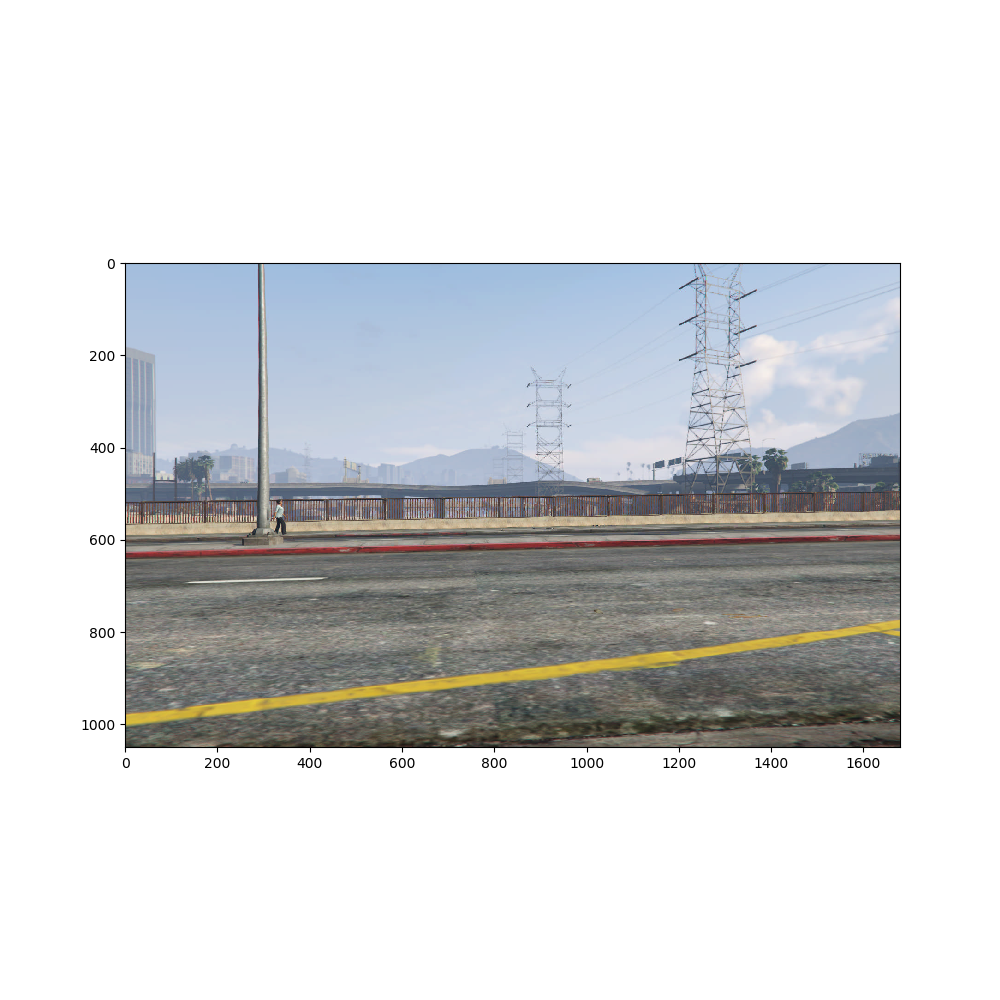

<IPython.core.display.Javascript object>


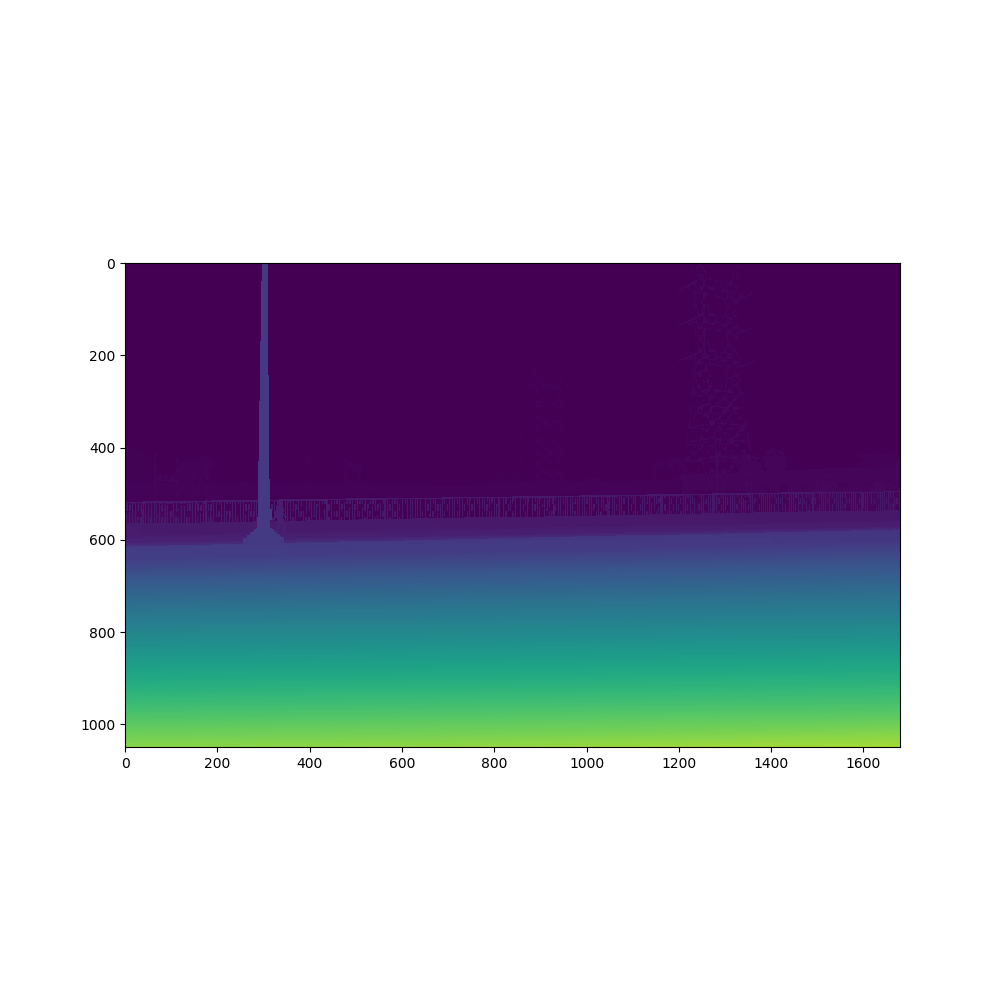

<IPython.core.display.Javascript object>


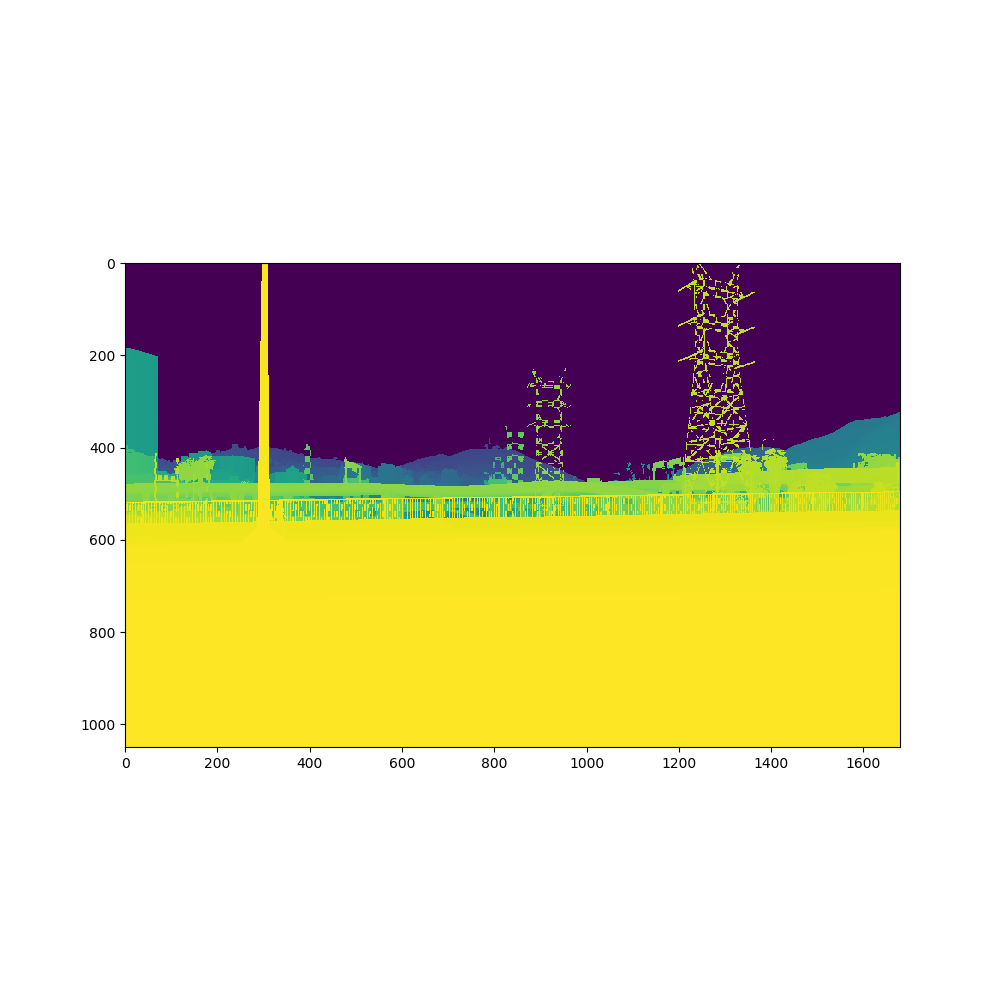

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(figsize=(10, 10))
plt.imshow(im)

plt.figure(figsize=(10, 10))
plt.imshow(depth)

plt.figure(figsize=(10, 10))
plt.imshow(new_depth)

plt.show()

In [23]:
from gta_math import generate_points, points_to_homo, ndc_to_view
import numpy as np

def save_csv(vecs_p, name):
    a = np.asarray(vecs_p[0:3, :].T)
    np.savetxt("global-points-{}.csv".format(name), a, delimiter=",")
    
width = depth.shape[1]
height = depth.shape[0]
points = generate_points(width, height)
params = {
    'width': width,
    'height': height,
    'proj_matrix': proj_matrix,
}
vecs = points_to_homo(points, params, depth, tresholding=False)
vecs_p = ndc_to_view(vecs, proj_matrix)
    
print('image {} projected'.format(name))
save_csv(vecs_p, get_base_name(name))

vecs.shape
(4, 1764000)
image 2018-02-18--22-29-14--624.tiff projected
